# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
%pylab inline
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


1. Is the distribution of body temperatures normal?

The CLT says that in most situations even if the original data is not normally distributed, the normalized sum of independant random variables tends toward a normal distribution.  We can qualitatively look for a normal distribution by plotting the data using a histogram.

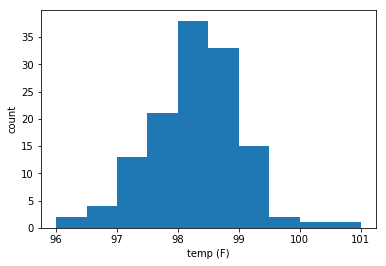

In [3]:
bin_edges = [96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100, 100.5, 101]
plt.hist(df.temperature, bins=bin_edges)
plt.xlabel('temp (F)')
plt.ylabel('count')

As we see above, there is approximately a normal distribution curve.

Is the sample size large? Are the observations independent? 
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

A large sample size is considered to be more than 30 samples.  We'll look at the length of our dataframe below.

In [25]:
len(df)

130

As we can see the dataframe contains 130 observations/samples which means this is a large sample size.  We can also conclude that the observations are independant as they are collected from 130 different people; as far as we know: one person's measurement isn't based on/influenced by the measurement from another person.

Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the t or z statistic?
Now try using the other test. How is the result be different? Why?

We don't know if the true population mean is 98.6 however we can find our sample mean and test the probability of our answer being statistically significant.

In [26]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

This shows the sample mean as slightly lower than 98.6.  If we say that the null hypothesis is the mean population temperature is 98.6 and the alternative hypothesis is that it is other than that we can test for if this group is representative of the whole.  We would want to use a one-sample test because we're looking at population as whole.  If we were comparing men and women, then a two-sample test would be appropriate.  We will use a z-value because we have a large sample size (>30 samples).

Based on our assumption that null hypothesis is true and the population mean is 98.6, we can say our sample mean should be 98.6.  With the CLT we can then say that the standard deviation of our sampling distribution will be estimated by the standard deviation of our sample over the square-root of our total samples.

In [27]:
stdev = 0.733183/sqrt(130)
stdev

0.064304402976958566

With this value we can calculate our z-score for the sample mean by taking the difference between the assumed mean and our sample mean, divided by the sampling distributions standard deviation.

In [28]:
z = (98.6 - 98.25)/stdev
z

5.442862133801408

This shows us we're seeing 5.44 standard deviations from the assumed mean.  We know that 99.7% of the area under a normal distribution curve is within 3 standard deviations, so this implies there is much less than a 0.3% chance this our sample average is random chance.  Considering this, we would reject the null hypothesis and say that normal body temperature is different than 98.6 degrees.

However, perhaps we should have used a two-sample test.  Lets see how the results change if we split the groups into men and women.  

In [37]:
dfm = df[df.gender == 'M']
dff = df[df.gender == 'F']
print(len(dfm))
print(len(dff))

65
65


As we can see the data is split equally between men and women.  Let's look at the sample mean for each group.

In [40]:
print(dfm.describe())
print(dff.describe())

       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


Performing the same calculations above for both groups:

In [44]:
stdev = 0.698756/sqrt(65)
zm = (98.6 - 98.10)/stdev
print(zm)

stdev = 0.743488/sqrt(65)
zf = (98.6 - 98.39)/stdev
print(zf)

5.76900788566
2.27720437605


We can see than the z-score for females is lower than males, with 2.28.  Referring to a z-table, that gives us a probability of less than 2% this result was random.  Based on both samples we should reject the null hypothesis and conclude the average body temperature is different than 98.6.

At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval.

Now that we've determined that 98.6 isn't correct, let's assume our sample is truly representative of the total population.  This gives us the standard deviation of our sampling distribution.

In [45]:
stdev = 0.733183/sqrt(130)
stdev

0.064304402976958566

A rule of thumb in this case is that approximately 95.4% of the probable means fall within 2 standard deviations of the sample mean. So we multiply the above number by 2 then add/subtract from the sample mean to find our margin of error at a 95.4% confidence interval. 

In [47]:
print(98.25 + 2 * stdev)
print(98.25 - 2 * stdev)

98.378608806
98.121391194


If we see a temperature outside these boundries, we can be 95% sure that the outcome is 'abnormal' among the population.

Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem.

In order to figure out if there is a significant difference between males and females we need to figure out the distribution of the difference of the means.  This requires a two-sample test because we need to break the groups into men and women.  Assuming we would like a 95% confidence interval, the critical z-value will be 1.96.  We begin by finding the difference in means between the groups then find the standard deviation of the difference between our sample groups.  The next step is multiplying the standard deviation by 1.96 to see if the result is significant.

In [49]:
print(98.393846 - 98.104615)
stdev = sqrt(((0.743488 ** 2) / 65) + ((0.698756 ** 2) / 65))
print(1.96 * stdev)

0.2892310000000009
0.248045826197


This shows us that the difference between the means is significant as the standard deviation of the sample population means gives us a lower boundary margin of error for the male sample of 98.14 and the mean female sample temp is lower than that boundary.

What we can see from this data is that the original conclusions by Carl Wunderlich aren't supported by our statistical inference with 95% confidence.  There is a difference in means between males and females, with males being warmer on average than females.  Depending on how Wunderlich designed his experiment, for instance using only a small group of  males for his population sample, he may have come to his conclusion off of poor sample population data.